# Previsões de doenças cardíacas

As doenças cardíacas, também conhecidas como doenças cardiovasculares, são um termo amplo usado para designar doenças e condições que afetam o coração e o sistema circulatório. É uma das principais causas de incapacidade em todo o mundo. Como o coração está entre os órgãos mais vitais do corpo, é as doenças afetam também outros órgãos e partes do corpo. Existem vários tipos e formas diferentes de doenças cardíacas. As mais comuns causam estreitamento ou bloqueio das artérias coronárias, mau funcionamento das válvulas do coração e aumento do tamanho do coração. e vários outros levando à insuficiência cardíaca e ataque cardíaco.

## Pergunta alvo

A partir dos dados é possível prever se o paciente tem ou não uma doença cardiaca?

## Principais fatos de acordo com a OMS (Organizações Mundiais de Saúde)
As doenças cardiovasculares (DCV) são a principal causa de morte em todo o mundo. Estima-se que 17,9 milhões de pessoas morreram de doenças cardiovasculares em 2019, o que representa 32% de todas as mortes globais. Destas mortes, 85% foram devido a ataque cardíaco e acidente vascular cerebral. Mais de três quartos das mortes por DCV ocorrem em países de baixo e médio rendimento.

Dos 17 milhões de mortes prematuras (com menos de 70 anos) devido a doenças não transmissíveis em 2019, 38% foram causadas por DCV. A maioria das doenças cardiovasculares pode ser prevenida através da abordagem de factores de risco comportamentais, como o consumo de tabaco, alimentação pouco saudável e obesidade, sedentarismo e consumo nocivo de álcool. É importante detectar doenças cardiovasculares o mais cedo possível para que o tratamento com aconselhamento e medicamentos possa começar.

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv("data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Atributos

age: idade em anos

sex: sexo (1 = masculino;0 = feminino)

chest pain type: tipo de dor no peito (0 = angina típica (dor no peito típica); 1 = angina atípica (dor no peito, não relacionado ao coração); 2 = dor não anginosa (espasmos, não relacionado ao coração); 3 = assintomático (dor torácica, sem sinais de doença)

trestbps: pressão arterial em repouso (valores entre 130-140 é motivo de preocupação)

chol: colesterol em mg/dl (acima de 200 é motivo de preocupação)

fbs: glicemia em jejum > 120 mg/dl (1 = verdadeiro; 0 = falso)(>126mg/dl sinal de diabete)

restecg: resultados eletrocardiográficos em repouso (0 = normal; 1 = anormalidade; 2 = hipertrofia ventricular)

thalach: frequência cardíaca máxima

exang: dor induzida pelo exercício ( 1 = sim; 0 = não)

oldpeak: depressão induzida pelo exercício em relação ao repouso (oberservar o estresse do coração durante o exercício)

slope: inclinação do segmento do exercício (0 = ascendente; 1 = plano; 2 = descida)

ca: número de vasos principais (0-3) coloridos por fluorosopia (vaso colorido significa que o médico pode ver o sangue passando)

thal: resultado do estresse de tálio (0 = normal; 1 = defeito fixo; 2 = defeito reversível)

target: 0 = sem doença; 1 = com doença

Este conjunto de dados data de 1988 e consiste em quatro bases de dados: Cleveland, Hungria, Suíça e Long Beach V. Contém 76 atributos, incluindo o atributo previsto, mas todos os experimentos publicados referem-se ao uso de um subconjunto de 14 deles. O campo “alvo” refere-se à presença de doença cardíaca no paciente. É um número inteiro com valor 0 = sem doença e 1 = doença.

Os nomes e números de segurança social dos pacientes foram recentemente removidos do banco de dados e substituídos por valores fictícios.

In [16]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## Analise Exploratória de dados

Vamos verificar a coluna target para ver a quantidade de cada caso:

In [17]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

Vamos transformar em % os resultados da base de dados:

In [18]:
df["target"].value_counts(normalize=True)

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

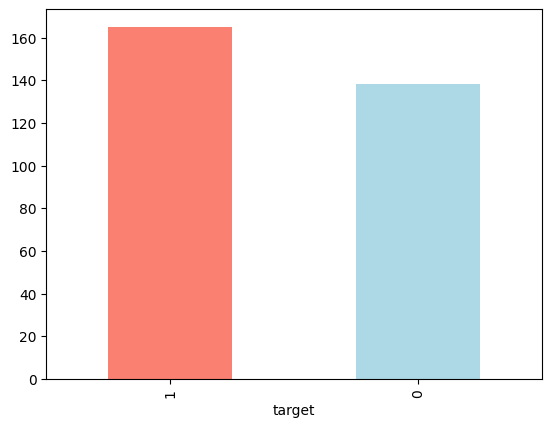

In [19]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [21]:
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


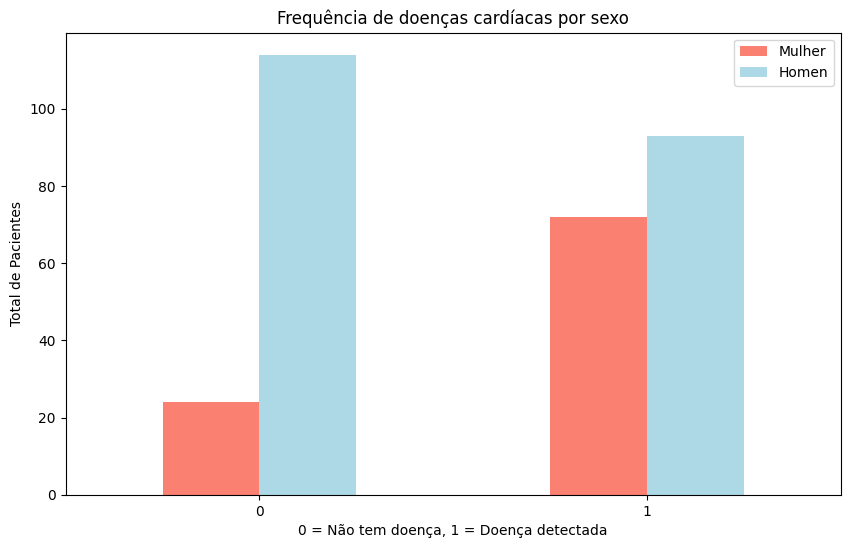

In [22]:
# Criando o plot
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

# Adicionando atributos
plt.title("Frequência de doenças cardíacas por sexo")
plt.xlabel("0 = Não tem doença, 1 = Doença detectada")
plt.ylabel("Total de Pacientes")
plt.legend(["Mulher", "Homen"])
plt.xticks(rotation=0); # configura os eixos dos labels para vertical

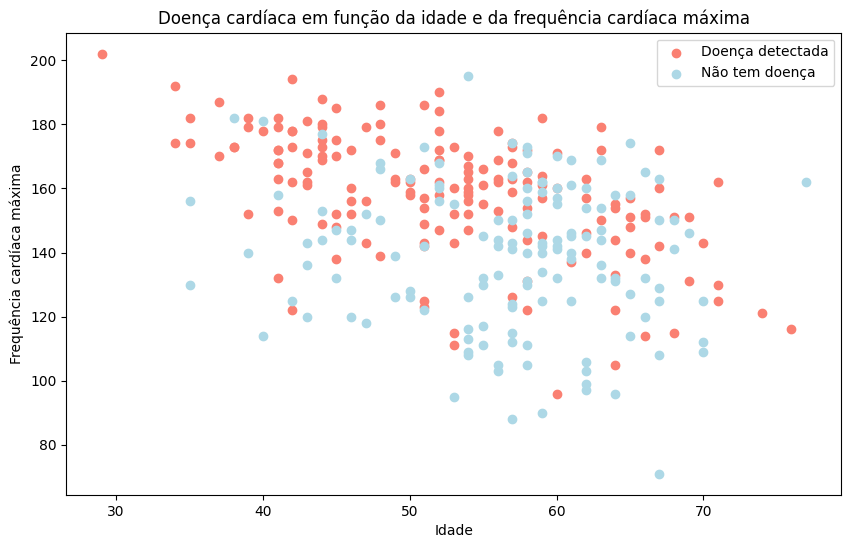

In [23]:
plt.figure(figsize=(10,6))

# Plot para valores positivos
plt.scatter(df["age"][df["target"] ==1 ], 
            df["thalach"][df["target"] == 1], 
            c="salmon")

# Plot para valores negativos
# queremos plotar no mesmo gráfico então não vamos configurar axes diferentes
plt.scatter(df["age"][df["target"] == 0], 
            df["thalach"][df["target"] == 0], 
            c="lightblue")

# Atributos
plt.title("Doença cardíaca em função da idade e da frequência cardíaca máxima")
plt.xlabel("Idade")
plt.legend(["Doença detectada", "Não tem doença"])
plt.ylabel("Frequência cardíaca máxima");

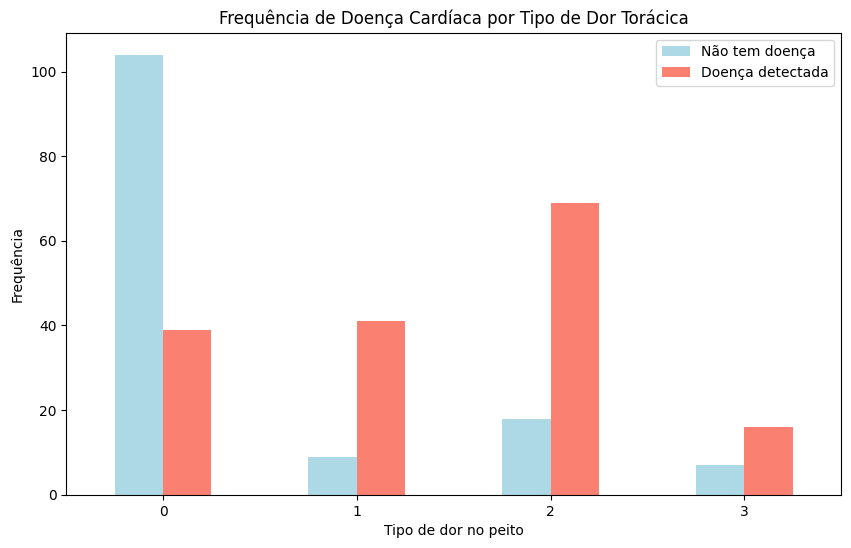

In [24]:
pd.crosstab(df["cp"], df["target"]).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

# Adicionando atributos ao gráfico
plt.title("Frequência de Doença Cardíaca por Tipo de Dor Torácica")
plt.xlabel("Tipo de dor no peito")
plt.ylabel("Frequência")
plt.legend(["Não tem doença", "Doença detectada"])
plt.xticks(rotation = 0);

CP (dor no peito)
0 = dor no peito típica;
1 = dor no peito, não relacionado ao coração; 
2 = espasmos, não relacionado ao coração; 
3 = dor torácica, sem sinais de doença.

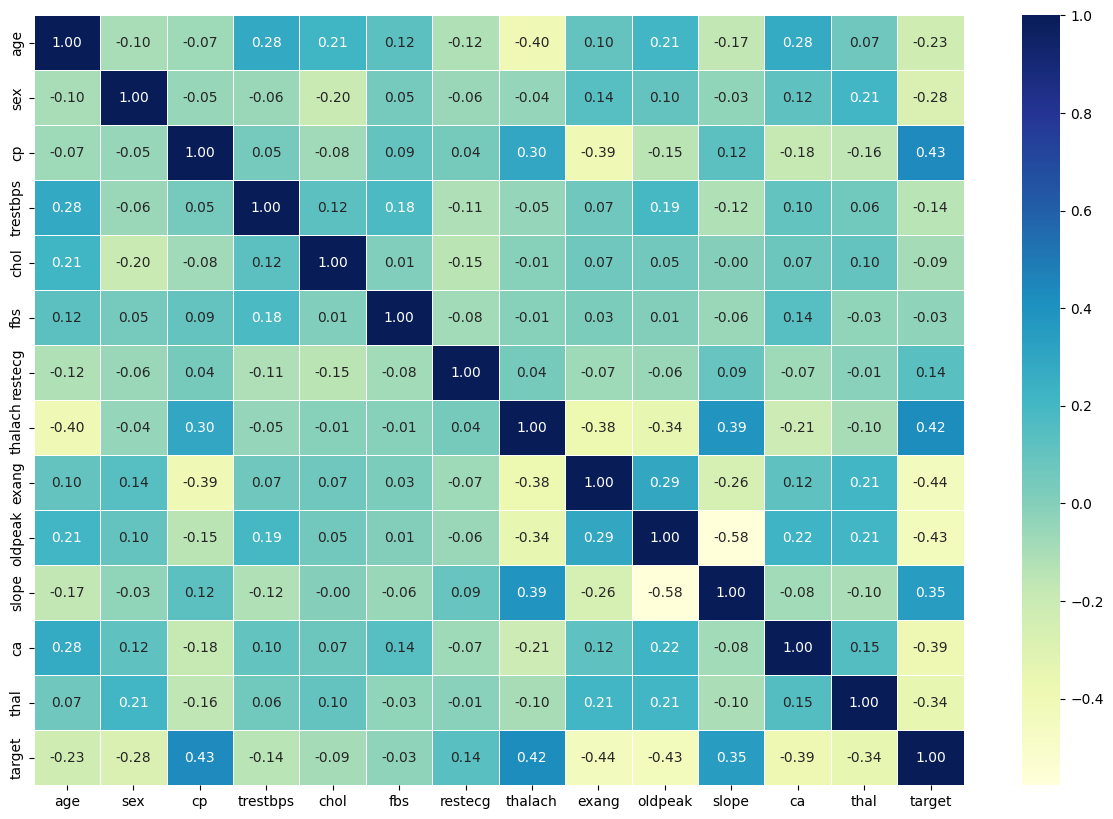

In [25]:
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

# Modelagem dos dados

In [26]:
X = df.drop("target", axis=1)
y = df["target"]

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [27]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


# Treino e teste

In [28]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Quantidade de dados para treino:

In [29]:
len(X_train), len(y_train)

(242, 242)

Quantidade de dados para teste:

In [30]:
len(X_test), len(y_test)

(61, 61)

In [31]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

Colocar em um dicionário:

In [34]:
models = {"KNN": KNeighborsClassifier(),
           "Logistc Regression": LogisticRegression(max_iter=1000),
           "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
  np.random.seed(42)

  model_scores = {}

  for name, model in models.items():
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_test, y_test)
  return model_scores

In [35]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344,
 'Logistc Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

# Ajuste de hiperparâmetros e validaçao cruzada


In [36]:
# Lista para armazenar o score de treino
train_scores = []

# Lista para armazenar o score de teste
test_scores = []

# Lista com diferentes valores para "n_neighbors"
# vamos começar com 1 e subir até 20
neighbors = range(1, 21)

# Instanciando o KNN
knn = KNeighborsClassifier()

# Loop para aplicar os diferentes valores em "n_neighbors"
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Treina o modelo
    knn.fit(X_train, y_train)
    
    # Guarda o score de treino
    train_scores.append(knn.score(X_train, y_train))
    
    # Armazena o score de teste
    test_scores.append(knn.score(X_test, y_test))

In [37]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Desempenho máximo de KNN nos dados de teste: 75.41%


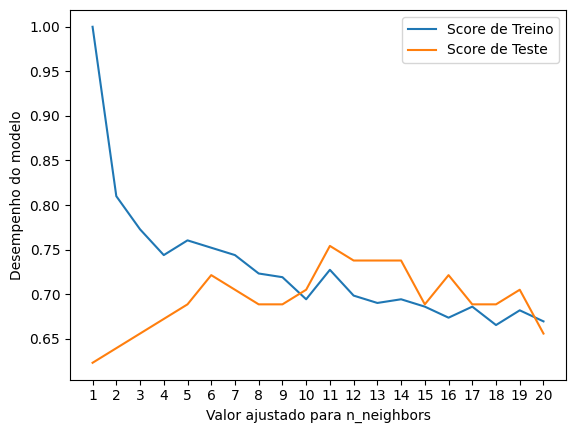

In [38]:
plt.plot(neighbors, train_scores, label="Score de Treino")
plt.plot(neighbors, test_scores, label="Score de Teste")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Valor ajustado para n_neighbors")
plt.ylabel("Desempenho do modelo")
plt.legend()

print(f"Desempenho máximo de KNN nos dados de teste: {max(test_scores)*100:.2f}%")

## RandomizedSearchCV

In [39]:
# LogisticRegression hiperparâmetros
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# RandomForestClassifier hiperparâmetros
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [40]:
# Import
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Definindo o seed
np.random.seed(42)

# Configurando hiperparâmetros para LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Treinando o modelo com as 20 combinações possíveis
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [44]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [42]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [43]:
# Definindo o seed
np.random.seed(42)

# Configurando hiperparâmetros para RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Treinando o modelo com as 20 combinações possíveis
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [45]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [46]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [47]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [48]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [49]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [50]:
y_preds = gs_log_reg.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


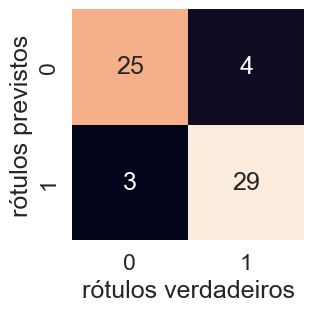

In [53]:
# Seaborn
import seaborn as sns
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("rótulos verdadeiros")
    plt.ylabel("rótulos previstos")
    
plot_conf_mat(y_test, y_preds)

In [54]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [55]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [56]:
# Importa cross_val_score
from sklearn.model_selection import cross_val_score

# Passando o melhor modelo com os melhores hiperparâmetros
# que encontramos com (GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [57]:
# Cross-validated (validação cruzada)
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [58]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [59]:
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5,
                                       scoring="precision"))

cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5,
                                    scoring="recall"))

cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5,
                                scoring="f1"))

cv_precision, cv_recall, cv_f1

(0.8215873015873015, 0.9272727272727274, 0.8705403543192143)

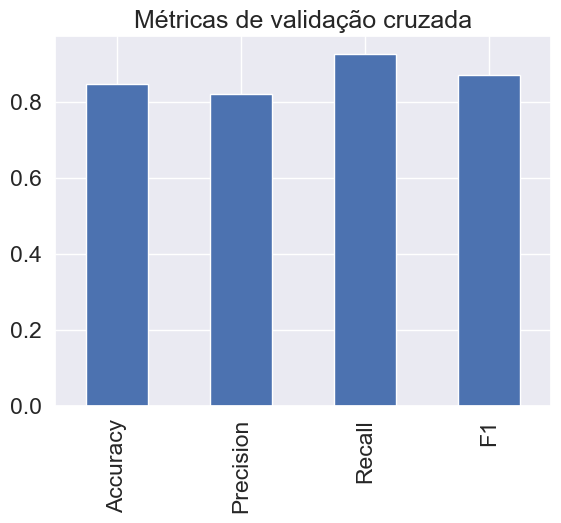

In [60]:
# Plot cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                            index=[0])
cv_metrics.T.plot.bar(title="Métricas de validação cruzada", legend=False);

In [61]:
clf.fit(X_train, y_train);
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [62]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003699220776580221,
 'sex': -0.9042409028785717,
 'cp': 0.6747282587404362,
 'trestbps': -0.011613401339975146,
 'chol': -0.0017036439067759743,
 'fbs': 0.047876881148997324,
 'restecg': 0.3349019815885189,
 'thalach': 0.02472938284108309,
 'exang': -0.6312040612837573,
 'oldpeak': -0.5759095045469952,
 'slope': 0.4709514073081419,
 'ca': -0.6516534770577476,
 'thal': -0.6998420764664995}

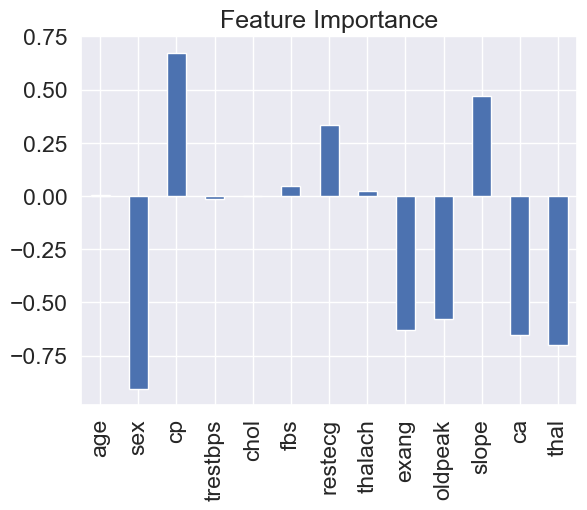

In [63]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

In [64]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93
